In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype
import plotly.express as px
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string


print("Dataset analysis fake news")
print("Link - https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset")
print("Sentiment Analysis of fake news dataset for target Donald Trump")

Dataset analysis fake news
Link - https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
Sentiment Analysis of fake news dataset for target Donald Trump


This notebook is extends notebook for fake news dataset analysis
https://www.kaggle.com/pulkit21aug/target-victim-of-fake-news
In the above notebook it was identified that Donald Trump is target of fake news dataset

Management decision problem - Take corrective action in  order to curtail the impact of fake news.
Analytics Research Problem - Identify the sentiment expressed for Fake news target - Donal Trump
Research Objective
  1. Pre-process data.  2. Sentiment Analysis.  3. Visualise
  2. Null Hypothesis - Positive sentiments towards Donald Trump

In [46]:
df_fake_news = pd.read_csv(r"E:/MyDrive-Phd/DataScience/Kaggle/fake_and_real_news/Fake.csv")
tokenizer = TweetTokenizer()


#tokenize, remove stopwords, non-alphabetic words, lowercase
def preprocess(textstring):
    stops = set(stopwords.words('english'))
    punctuations = list(string.punctuation)
    tokens = tokenizer.tokenize(textstring)
    return [token.lower() for token in tokens if token.isalpha()
            and token not in stops and token not in punctuations]


df_trump = df_fake_news[df_fake_news['text'].str.contains("trump")]
df_trump['pre_process_text'] = df_trump['text'].apply(preprocess)

c:\python\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Sentiment analysis for all the tweets as summary

In [47]:
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

trump_list = df_trump["pre_process_text"].apply(lambda x : " ".join(x))
##create text corpus only of tweets mentioning trump

trump_txt = " ".join(trump_list)
sentiments_score = sentiment.polarity_scores(trump_txt)
print(sentiments_score)

{'neg': 0.186, 'neu': 0.637, 'pos': 0.177, 'compound': -1.0}


Sentiment Score -
{'neg': 0.186, 'neu': 0.637, 'pos': 0.177, 'compound': -1.0}
As we see the compound score we  reject the null hypothesis that the tweets about Donald trump are positive.

Research Objective  - Sentiment over time

In [48]:
def net_sent_score(x) :
    score = sentiment.polarity_scores(x)
    if score.get('neg') > score.get('pos'):
        return  score.get('neg')* -1
    else:
        return  score.get('pos')


df_trump['sent_tokens'] = df_trump["pre_process_text"].apply(lambda x : " ".join(x))
df_trump['sent_score'] = df_trump['sent_tokens'].apply(lambda x : net_sent_score(x))
df_trump['date'] = pd.to_datetime(df_trump['date'],errors='coerce')
df_trump = df_trump.dropna(subset=['date'])
df_trump = df_trump.set_index(['date'])
# df_trump.index = pd.to_datetime(df_trump.index)

c:\python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\python\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\python\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

Plot the sentiments over time

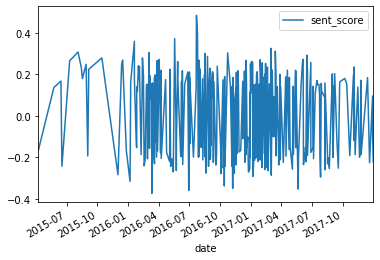

In [49]:
df = df_trump.groupby(pd.Grouper(freq='Y'))['sent_score'].mean()
df_trump.plot(y='sent_score')